# 制作GIF

In [ ]:
import numpy as np
from PIL import Image
import os
import time
import matplotlib.pyplot as plt
import imageio
#from moviepy.editor import ImageSequenceClip

path = "/home/liyuan3970/Typhoon_LMQ/src/vertical_wind/"
file = os.listdir(path)
file.sort()
for i in range(len(file)):
    file[i] = path +file[i]




def create_gif(image_list, gif_name, duration=0.35):
    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name, frames, 'GIF', duration=duration)
    return


def main():
    image_list =file
    gif_name = 'cr.gif'
    duration = 0.35
    create_gif(image_list, gif_name, duration)


if __name__ == '__main__':
    main()


(15, 3)
geog (120,)
lats (120,)
the Lon is :+++ 120.61667
(54, 23, 120)


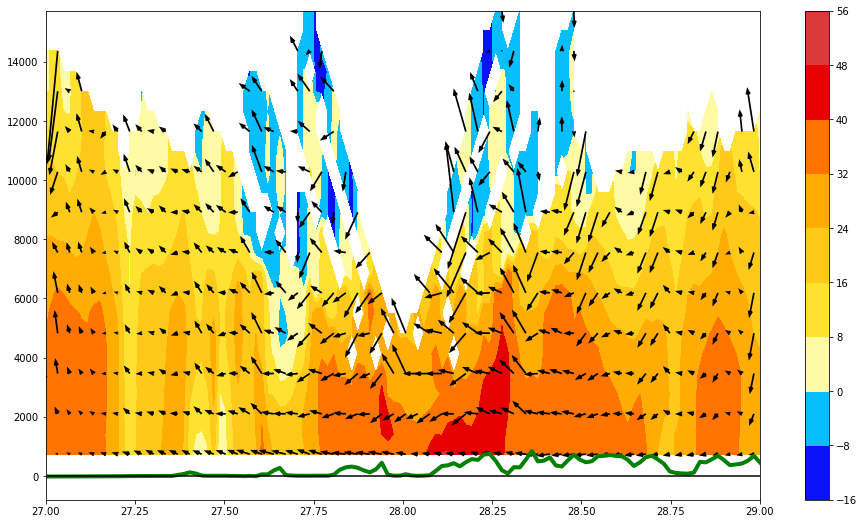

In [40]:
# -*- coding: utf-8 -*- 
from matplotlib import cm, colors

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from ncmaps import Cmaps

#设置rgb
fid = open('/home/liyuan3970/study_demo/met_plot/利齐马/src/radar.rgb')
data=fid.readlines()
n=len(data);
#print(n)
rgb=np.zeros((n,3))
for i in np.arange(n):
    #print(data[0].split(' '))
    rgb[i][0]=float(data[i].split(' ')[0])
    rgb[i][1]=data[i].split(' ')[1]
    rgb[i][2]=data[i].split(' ')[2]
print((rgb.shape))
#print(rgb[253])
rgb_file = 'ncl_default'
self_define_list = [24,85,132,148,158,168,188,220,240]
cmaps = Cmaps(rgb_file,self_define_list).listmap()
#cmaps= colors.ListedColormap(rgb)





from netCDF4 import Dataset
f = Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/location_gif.nc')
fg = Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/goeg_gif.nc')
lons = f.variables['lon'][:]
lats = f.variables['lat'][:]
heigh = f.variables['heigh'][:]
#print(heigh)
#print(level)
#97
lon_sing = 97
u = f.variables['u'][:,:,:,lon_sing]
v = f.variables['v'][:,:,:,lon_sing]
w = f.variables['w'][:,:,:,lon_sing]
ref = f.variables['ref'][:,:,:,lon_sing]
geog = fg.variables['geog'][:,lon_sing]
print('geog',geog.shape)
print('lats',lats.shape)
#x = f.variables['x'][:]
#print(x[90])
print('the Lon is :+++',lons[lon_sing])
print(u.shape)


def plot(it):
    # Contour Plot
    fig = plt.figure(figsize=[16, 9])
    X, Y = np.meshgrid(lats, heigh)
    Z = ref[it,:,:]
    cp = plt.contourf(X, Y, Z,cmap = cmaps)
    cb = plt.colorbar(cp)
    # Vector Field
    x,y= np.meshgrid(lats[::2], heigh[::2])
    U =v[it,::2,::2]
    V = w[it,::2,::2]*20
    quiv = plt.quiver(x, y, U, V,  # assign to var
               color='Black', 
               headlength=4)
    #y轴的数字是x轴数字的平方
    plt.plot(lats,geog,c='green',linewidth=4)
    y_values = np.zeros([120,1])
    plt.plot(lats,y_values,c='black')
    plt.savefig('/home/liyuan3970/Typhoon_LMQ/src/vertical_wind/'+str(it)+'.png')
    #plt.cla()
    #plt.plot(geog)
    #plt.show()
plot(0)
# for i in range(54):
#     #print(i)
#     plot(i)

/home/liyuan3970/.local/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:773: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/home/liyuan3970/.local/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:820: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


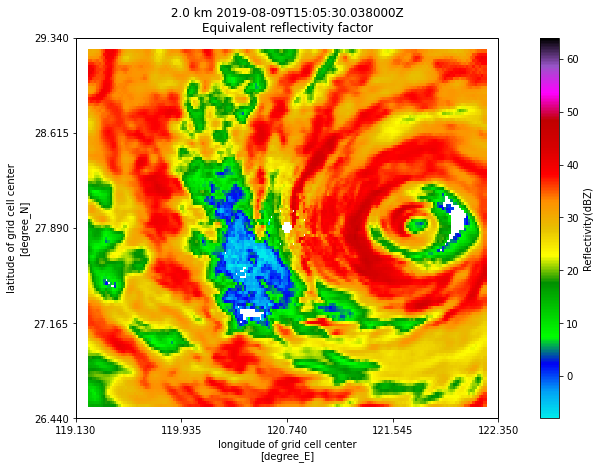

In [15]:
import pyart
import pydda
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
grids1 = pyart.io.read_grid('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/data_120*181/Z_RADR_I_Z9577_20190809150400_O_DOR_SA_CAP.bin.bz2.nc')
display = pyart.graph.GridMapDisplay(grids1)
fig = plt.figure(figsize=[15, 7])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# parameters
level = 3
vmin = -8
vmax = 64
lat = 36.5
lon = -98.0

# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
#display.plot_basemap(lon_lines = np.arange(-104, -93, 2) )
lat_min, lat_max, lon_min, lon_max = display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
                 cmap = pyart.graph.cm.NWSRef)

# IO

In [16]:
import pyart
import os
import netCDF4     # Note: python is case-sensitive!
import numpy as np

path ='/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/data_120*181/'
file = os.listdir(path)
file.sort()


def dataio(filename):
    filepath ='/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/data_120*181/'
    savepath = '/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/data_120/'
    grad_data = pyart.io.read_grid(filepath+filename)
    lon = np.linspace(np.around(lon_min),np.around(lon_max), 181)
    lat = np.linspace(np.around(lat_min),np.around(lat_max), 120)
    heigh = np.linspace(np.around(0),np.around(15000.0), 23)
    try: ncfile.close()  # just to be safe, make sure dataset is not already open.
    except: pass
    ncfile = netCDF4.Dataset(savepath+filename,mode='w',format='NETCDF4_CLASSIC') 
    print(ncfile)
    nlats = 120
    nlons = 181
    nheigh = 23
    lat_dim = ncfile.createDimension('lat', nlats)     # latitude axis
    lon_dim = ncfile.createDimension('lon', nlons)    # longitude axis
    heigh = ncfile.createDimension('heigh', nheigh)
    time_dim = ncfile.createDimension('time', None) # unlimited axis (can be appended to).
    ncfile.title=filename
    # Define two variables with the same names as dimensions,
    # a conventional way to define "coordinate variables".
    lat = ncfile.createVariable('lat', np.float32, ('lat',))
    lat.units = 'degrees_north'
    lat.long_name = 'latitude'
    lon = ncfile.createVariable('lon', np.float32, ('lon',))
    lon.units = 'degrees_east'
    lon.long_name = 'longitude'
    heigh = ncfile.createVariable('heigh', np.float32, ('heigh',))
    heigh.units = 'meter'
    heigh.long_name = 'meter'
    time = ncfile.createVariable('time', np.float64, ('time',))
    time.units = 'hours since 1800-01-01'
    time.long_name = 'time'
    # Define a 4D variable to hold the data
    ref= ncfile.createVariable('ref',np.float64,('time','heigh','lat','lon')) # note: unlimited dimension is leftmost
    ref.units = 'DBZ' # degrees Kelvin
    ref.standard_name = 'radar_DBZ' # this is a CF standard name
    # Define a 4D variable to hold the data
    vt= ncfile.createVariable('vt',np.float64,('time','heigh','lat','lon')) # note: unlimited dimension is leftmost
    vt.units = 'V' # degrees Kelvin
    vt.standard_name = 'radar_v' # this is a CF standard name
    # Define a 4D variable to hold the data
    u= ncfile.createVariable('u',np.float64,('time','heigh','lat','lon')) # note: unlimited dimension is leftmost
    u.units = 'm/s' # degrees Kelvin
    u.standard_name = 'radar_wind_u' # this is a CF standard name
    # Define a 4D variable to hold the data
    v= ncfile.createVariable('v',np.float64,('time','heigh','lat','lon')) # note: unlimited dimension is leftmost
    v.units = 'm/s' # degrees Kelvin
    v.standard_name = 'radar_wind_v' # this is a CF standard name
    # Define a 4D variable to hold the data
    w= ncfile.createVariable('w',np.float64,('time','heigh','lat','lon')) # note: unlimited dimension is leftmost
    w.units = 'm/s' # degrees Kelvin
    w.standard_name = 'radar_wind_u' # this is a CF standard name
    lon[:] = np.linspace(np.around(lon_min),np.around(lon_max), 181)
    lat[:] = np.linspace(np.around(lat_min),np.around(lat_max), 120)
    heigh[:] = np.linspace(np.around(0),np.around(15000.0), 23)
    ref[0,:,:,:] = grad_data.fields['reflectivity']['data']
    vt[0,:,:,:] = grad_data.fields['VT']['data']
    u[0,:,:,:] = grad_data.fields['u']['data']
    v[0,:,:,:] = grad_data.fields['v']['data']
    w[0,:,:,:] = grad_data.fields['w']['data']
    ncfile.close()

for fi in file:
    dataio(fi)    


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/io/cfradial.py:365: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/io/cfradial.py:365: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group 

In [8]:
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
import multidop
import pyart
import tempfile
import os
import glob
import time
import pyart
import pydda
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr
import pyart

path ='/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/after_land/'
file = os.listdir(path)
file.sort()
# for i in range(len(file)):
#     file[i] = path +file[i]
#print(file)

filename = r"/home/liyuan3970/study_demo/met_plot/利齐马/src/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2"

def dataio(filename,file):
    fipath = '/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/data_120*181/'
    basedata1 = radar_io(filename) 
    r1 = basedata1.ToPyartRadar()
    cp1 = deepcopy(r1.fields['reflectivity']['data'])
    r1.add_field_like('reflectivity', 'DT', cp1, replace_existing=True)
    gatefilter1 = pyart.correct.GateFilter(r1)
    gatefilter1.exclude_masked('reflectivity')
    corr_vel1 = pyart.correct.dealias_region_based(
        r1, vel_field='velocity', keep_original=False, 
        gatefilter=gatefilter1, centered=True)
    r1.add_field('VT', corr_vel1, replace_existing=True)
    # The analysis engine currently expects the "missing_value" attribute
    r1.fields['DT']['missing_value'] = 1.0 * r1.fields['DT']['_FillValue']
    r1.fields['VT']['missing_value'] = 1.0 * r1.fields['VT']['_FillValue']
    radars1 =[r1]
    grids1 = pyart.map.grid_from_radars(
             radars1, grid_shape=(23, 120, 181),
            grid_limits=((0, 15000.0),(-150000, 150000), (-150000, 150000)),
            fields=['reflectivity','DT','VT'], gridding_algo="map_gates_to_grid",
            weighting_function='BARNES')
    # Set initialization and do retrieval
    u_init, v_init, w_init = make_initialization_from_era_interim(grids1, vel_field='VT')
    new_grids = pydda.retrieval.get_dd_wind_field([grids1],
                                                  u_init, v_init, w_init,
                                                  vel_name='VT', refl_field='DT',
                                                  mask_outside_opt=True)
    pyart.io.write_grid(fipath+file+'.nc', new_grids[0])



    
for fi in file:
    filename = path+fi
    dataio(filename,fi)



/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:27:15 ECMWF API python library 1.5.0
2020-06-06 11:27:15 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:27:17 Welcome li yuan
2020-06-06 11:27:18 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:27:19 Request submitted
2020-06-06 11:27:19 Request id: 5edb0d17593ca7c98165ed54
2020-06-06 11:27:19 Request is submitted
2020-06-06 11:27:22 Request is active
Calling 'nice mars /tmp/78/c9/tmp-_marsqbPwst.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.032720 - Welcome to MARS
mars - INFO   - 20200606.032720 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.032720 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:30:41 ECMWF API python library 1.5.0
2020-06-06 11:30:41 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:30:46 Welcome li yuan
2020-06-06 11:30:47 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:30:49 Request submitted
2020-06-06 11:30:49 Request id: 5edb0de93dad4860903cbdf2
2020-06-06 11:30:49 Request is submitted
2020-06-06 11:30:51 Request is active
Calling 'nice mars /tmp/92/1e/tmp-_marsggmXh6.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.033050 - Welcome to MARS
mars - INFO   - 20200606.033050 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.033050 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:35:22 ECMWF API python library 1.5.0
2020-06-06 11:35:22 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:35:24 Welcome li yuan
2020-06-06 11:35:25 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:35:26 Request submitted
2020-06-06 11:35:26 Request id: 5edb0efe4e6ee2858b61d193
2020-06-06 11:35:26 Request is submitted
2020-06-06 11:35:28 Request is active
Calling 'nice mars /tmp/99/9f/tmp-_marsAH34Ep.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.033526 - Welcome to MARS
mars - INFO   - 20200606.033526 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.033526 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:37:44 ECMWF API python library 1.5.0
2020-06-06 11:37:44 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:37:46 Welcome li yuan
2020-06-06 11:37:47 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:37:48 Request submitted
2020-06-06 11:37:48 Request id: 5edb0f8cc350c12d9065ed55
2020-06-06 11:37:48 Request is submitted
2020-06-06 11:37:50 Request is active
Calling 'nice mars /tmp/71/6a/tmp-_marsPZYxWe.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.033748 - Welcome to MARS
mars - INFO   - 20200606.033748 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.033748 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:39:17 ECMWF API python library 1.5.0
2020-06-06 11:39:17 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:39:19 Welcome li yuan
2020-06-06 11:39:20 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:39:21 Request submitted
2020-06-06 11:39:21 Request id: 5edb0fe94e6ee2858b61d195
2020-06-06 11:39:21 Request is submitted
2020-06-06 11:39:23 Request is active
Calling 'nice mars /tmp/04/e1/tmp-_mars_gvKNY.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.033921 - Welcome to MARS
mars - INFO   - 20200606.033921 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.033921 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:40:48 ECMWF API python library 1.5.0
2020-06-06 11:40:48 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:40:49 Welcome li yuan
2020-06-06 11:40:50 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:40:51 Request submitted
2020-06-06 11:40:51 Request id: 5edb1043e706d67a2a795196
2020-06-06 11:40:51 Request is submitted
2020-06-06 11:40:53 Request is active
Calling 'nice mars /tmp/c9/b3/tmp-_marsmlrNUw.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.034051 - Welcome to MARS
mars - INFO   - 20200606.034051 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.034051 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:42:12 ECMWF API python library 1.5.0
2020-06-06 11:42:12 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:42:13 Welcome li yuan
2020-06-06 11:42:14 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:42:15 Request submitted
2020-06-06 11:42:15 Request id: 5edb109705cc7fe681795192
2020-06-06 11:42:15 Request is submitted
2020-06-06 11:42:17 Request is active
Calling 'nice mars /tmp/18/b6/tmp-_marsLKaXoL.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.034216 - Welcome to MARS
mars - INFO   - 20200606.034216 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.034216 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:43:46 ECMWF API python library 1.5.0
2020-06-06 11:43:46 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:43:57 Welcome li yuan
2020-06-06 11:43:58 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:43:59 Request submitted
2020-06-06 11:43:59 Request id: 5edb10ffd22dbf15dc65ed52
2020-06-06 11:43:59 Request is submitted
2020-06-06 11:44:01 Request is active
Calling 'nice mars /tmp/a2/57/tmp-_mars19t8gl.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.034359 - Welcome to MARS
mars - INFO   - 20200606.034359 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.034359 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:45:16 ECMWF API python library 1.5.0
2020-06-06 11:45:16 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:45:17 Welcome li yuan
2020-06-06 11:45:18 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:45:19 Request submitted
2020-06-06 11:45:19 Request id: 5edb114f661422d635795195
2020-06-06 11:45:19 Request is submitted
2020-06-06 11:45:21 Request is active
Calling 'nice mars /tmp/73/39/tmp-_marsXlhJFS.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.034520 - Welcome to MARS
mars - INFO   - 20200606.034520 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.034520 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:47:22 ECMWF API python library 1.5.0
2020-06-06 11:47:22 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:47:23 Welcome li yuan
2020-06-06 11:47:24 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:47:25 Request submitted
2020-06-06 11:47:25 Request id: 5edb11cd36ddbd93b5795193
2020-06-06 11:47:25 Request is submitted
2020-06-06 11:47:28 Request is active
Calling 'nice mars /tmp/ba/b2/tmp-_mars3TG8zK.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.034726 - Welcome to MARS
mars - INFO   - 20200606.034726 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.034726 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:49:09 ECMWF API python library 1.5.0
2020-06-06 11:49:09 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:49:10 Welcome li yuan
2020-06-06 11:49:11 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:49:12 Request submitted
2020-06-06 11:49:12 Request id: 5edb1238729fc4b74465ed4e
2020-06-06 11:49:12 Request is submitted
2020-06-06 11:49:14 Request is active
Calling 'nice mars /tmp/b5/24/tmp-_marsT8pwqs.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.034912 - Welcome to MARS
mars - INFO   - 20200606.034912 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.034912 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:54:41 ECMWF API python library 1.5.0
2020-06-06 11:54:41 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:54:43 Welcome li yuan
2020-06-06 11:54:44 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:54:45 Request submitted
2020-06-06 11:54:45 Request id: 5edb1385243ce2fdb4795191
2020-06-06 11:54:45 Request is submitted
2020-06-06 11:54:47 Request is active
Calling 'nice mars /tmp/1d/dc/tmp-_marsoYI7go.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.035446 - Welcome to MARS
mars - INFO   - 20200606.035446 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.035446 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 11:56:23 ECMWF API python library 1.5.0
2020-06-06 11:56:23 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 11:56:24 Welcome li yuan
2020-06-06 11:56:25 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 11:56:26 Request submitted
2020-06-06 11:56:26 Request id: 5edb13ea6eee2a7d6a61d196
2020-06-06 11:56:26 Request is submitted
2020-06-06 11:56:29 Request is active
Calling 'nice mars /tmp/aa/d3/tmp-_marseaxY8_.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.035627 - Welcome to MARS
mars - INFO   - 20200606.035627 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.035627 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:00:22 ECMWF API python library 1.5.0
2020-06-06 12:00:22 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:00:24 Welcome li yuan
2020-06-06 12:00:25 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:00:26 Request submitted
2020-06-06 12:00:26 Request id: 5edb14da92093afc9c3cbdf2
2020-06-06 12:00:26 Request is submitted
2020-06-06 12:00:28 Request is active
Calling 'nice mars /tmp/b0/75/tmp-_mars8B8JSG.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.040026 - Welcome to MARS
mars - INFO   - 20200606.040026 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.040026 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:04:51 ECMWF API python library 1.5.0
2020-06-06 12:04:51 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:04:52 Welcome li yuan
2020-06-06 12:04:53 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:04:54 Request submitted
2020-06-06 12:04:54 Request id: 5edb15e6c005c8615b3cbdfa
2020-06-06 12:04:54 Request is submitted
2020-06-06 12:04:56 Request is active
Calling 'nice mars /tmp/25/fd/tmp-_marsGr0prN.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.040455 - Welcome to MARS
mars - INFO   - 20200606.040455 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.040455 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:09:48 ECMWF API python library 1.5.0
2020-06-06 12:09:48 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:09:49 Welcome li yuan
2020-06-06 12:09:51 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:09:52 Request submitted
2020-06-06 12:09:52 Request id: 5edb1710140d56fe9561d195
2020-06-06 12:09:52 Request is submitted
2020-06-06 12:09:54 Request is active
Calling 'nice mars /tmp/be/61/tmp-_marsK8f0W5.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.040952 - Welcome to MARS
mars - INFO   - 20200606.040952 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.040952 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:14:58 ECMWF API python library 1.5.0
2020-06-06 12:14:58 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:15:00 Welcome li yuan
2020-06-06 12:15:01 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:15:02 Request submitted
2020-06-06 12:15:02 Request id: 5edb1846610f49f3c1795193
2020-06-06 12:15:02 Request is submitted
2020-06-06 12:15:04 Request is active
Calling 'nice mars /tmp/64/b2/tmp-_marsHPrm8e.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.041502 - Welcome to MARS
mars - INFO   - 20200606.041502 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.041502 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:19:40 ECMWF API python library 1.5.0
2020-06-06 12:19:40 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:19:41 Welcome li yuan
2020-06-06 12:19:42 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:19:43 Request submitted
2020-06-06 12:19:43 Request id: 5edb195f6357a409af3cbdf2
2020-06-06 12:19:43 Request is submitted
2020-06-06 12:19:45 Request is active
Calling 'nice mars /tmp/2f/9e/tmp-_marsivNsmb.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.041943 - Welcome to MARS
mars - INFO   - 20200606.041943 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.041943 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:23:22 ECMWF API python library 1.5.0
2020-06-06 12:23:22 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:23:23 Welcome li yuan
2020-06-06 12:23:24 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:23:25 Request submitted
2020-06-06 12:23:25 Request id: 5edb1a3d12173f41553cbdf5
2020-06-06 12:23:25 Request is submitted
2020-06-06 12:23:28 Request is active
Calling 'nice mars /tmp/61/25/tmp-_marsiW0NNv.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.042325 - Welcome to MARS
mars - INFO   - 20200606.042325 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.042325 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:27:55 ECMWF API python library 1.5.0
2020-06-06 12:27:55 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:27:56 Welcome li yuan
2020-06-06 12:27:57 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:27:58 Request submitted
2020-06-06 12:27:58 Request id: 5edb1b4e4d56717fa5795193
2020-06-06 12:27:58 Request is submitted
2020-06-06 12:28:00 Request is active
Calling 'nice mars /tmp/e6/8b/tmp-_marsrh93_Z.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.042758 - Welcome to MARS
mars - INFO   - 20200606.042758 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.042758 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:32:24 ECMWF API python library 1.5.0
2020-06-06 12:32:24 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:32:25 Welcome li yuan
2020-06-06 12:32:26 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:32:27 Request submitted
2020-06-06 12:32:27 Request id: 5edb1c5ba252e980de65ed4e
2020-06-06 12:32:27 Request is submitted
2020-06-06 12:32:29 Request is active
Calling 'nice mars /tmp/34/57/tmp-_marsFbA8bc.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.043227 - Welcome to MARS
mars - INFO   - 20200606.043227 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.043227 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:34:27 ECMWF API python library 1.5.0
2020-06-06 12:34:27 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:34:29 Welcome li yuan
2020-06-06 12:34:30 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:34:32 Request submitted
2020-06-06 12:34:32 Request id: 5edb1cd8cc766315c965ed4e
2020-06-06 12:34:32 Request is submitted
2020-06-06 12:34:34 Request is active
Calling 'nice mars /tmp/a0/08/tmp-_mars64RJCu.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.043433 - Welcome to MARS
mars - INFO   - 20200606.043433 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.043433 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:38:06 ECMWF API python library 1.5.0
2020-06-06 12:38:06 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:38:07 Welcome li yuan
2020-06-06 12:38:08 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:38:09 Request submitted
2020-06-06 12:38:09 Request id: 5edb1db17a9bf31bfa795193
2020-06-06 12:38:09 Request is submitted
2020-06-06 12:38:11 Request is active
Calling 'nice mars /tmp/84/ae/tmp-_marsesCWBg.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.043809 - Welcome to MARS
mars - INFO   - 20200606.043809 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.043809 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:42:09 ECMWF API python library 1.5.0
2020-06-06 12:42:09 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:42:10 Welcome li yuan
2020-06-06 12:42:11 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:42:13 Request submitted
2020-06-06 12:42:13 Request id: 5edb1ea470bc21034261d196
2020-06-06 12:42:13 Request is submitted
2020-06-06 12:42:15 Request is active
Calling 'nice mars /tmp/75/cb/tmp-_marsto9Mlh.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.044213 - Welcome to MARS
mars - INFO   - 20200606.044213 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.044213 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:44:36 ECMWF API python library 1.5.0
2020-06-06 12:44:36 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:44:37 Welcome li yuan
2020-06-06 12:44:40 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:44:42 Request submitted
2020-06-06 12:44:42 Request id: 5edb1f3af680bf6bd665ed51
2020-06-06 12:44:42 Request is submitted
2020-06-06 12:44:44 Request is active
Calling 'nice mars /tmp/24/3e/tmp-_marsQ4nGzs.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.044443 - Welcome to MARS
mars - INFO   - 20200606.044443 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.044443 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:46:54 ECMWF API python library 1.5.0
2020-06-06 12:46:54 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:46:55 Welcome li yuan
2020-06-06 12:46:57 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:46:58 Request submitted
2020-06-06 12:46:58 Request id: 5edb1fc220ef686b2d79519a
2020-06-06 12:46:58 Request is submitted
2020-06-06 12:47:00 Request is active
Calling 'nice mars /tmp/ee/3d/tmp-_marsAWQgiw.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.044700 - Welcome to MARS
mars - INFO   - 20200606.044700 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.044700 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:50:41 ECMWF API python library 1.5.0
2020-06-06 12:50:41 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:50:43 Welcome li yuan
2020-06-06 12:50:44 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:50:45 Request submitted
2020-06-06 12:50:45 Request id: 5edb20a5022242dabe65ed4e
2020-06-06 12:50:45 Request is submitted
2020-06-06 12:50:47 Request is active
Calling 'nice mars /tmp/c2/c6/tmp-_marsEcqNw0.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.045045 - Welcome to MARS
mars - INFO   - 20200606.045045 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.045045 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:55:33 ECMWF API python library 1.5.0
2020-06-06 12:55:33 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:55:38 Welcome li yuan
2020-06-06 12:55:39 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:55:40 Request submitted
2020-06-06 12:55:40 Request id: 5edb21ccebb210300465ed4e
2020-06-06 12:55:40 Request is submitted
2020-06-06 12:55:42 Request is active
Calling 'nice mars /tmp/1e/55/tmp-_marsJo6rse.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.045541 - Welcome to MARS
mars - INFO   - 20200606.045541 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.045541 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 12:59:43 ECMWF API python library 1.5.0
2020-06-06 12:59:43 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 12:59:44 Welcome li yuan
2020-06-06 12:59:45 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 12:59:46 Request submitted
2020-06-06 12:59:46 Request id: 5edb22c12904ebf6ae61d196
2020-06-06 12:59:46 Request is submitted
Calling 'nice mars /tmp/8e/fe/tmp-_marsiKwY6j.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.045946 - Welcome to MARS
mars - INFO   - 20200606.045946 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.045946 - MARS Client package version: 6.27.7
mars - INFO   - 2020060

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:03:13 ECMWF API python library 1.5.0
2020-06-06 13:03:13 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:03:15 Welcome li yuan
2020-06-06 13:03:16 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:03:17 Request submitted
2020-06-06 13:03:17 Request id: 5edb2395cb5d7920bf65ed50
2020-06-06 13:03:17 Request is submitted
2020-06-06 13:03:22 Request is active
Calling 'nice mars /tmp/9a/52/tmp-_marsfhQ_vR.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.050317 - Welcome to MARS
mars - INFO   - 20200606.050317 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.050317 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:06:29 ECMWF API python library 1.5.0
2020-06-06 13:06:29 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:06:30 Welcome li yuan
2020-06-06 13:06:31 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:06:32 Request submitted
2020-06-06 13:06:32 Request id: 5edb2458ae364ec660795193
2020-06-06 13:06:32 Request is submitted
2020-06-06 13:06:34 Request is active
Calling 'nice mars /tmp/b3/f5/tmp-_mars95OdDv.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.050632 - Welcome to MARS
mars - INFO   - 20200606.050632 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.050632 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:08:32 ECMWF API python library 1.5.0
2020-06-06 13:08:32 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:08:34 Welcome li yuan
2020-06-06 13:08:35 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:08:36 Request submitted
2020-06-06 13:08:36 Request id: 5edb24d4bf50b635d165ed4f
2020-06-06 13:08:36 Request is submitted
2020-06-06 13:08:38 Request is active
Calling 'nice mars /tmp/4f/7c/tmp-_marsSZeIyc.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.050836 - Welcome to MARS
mars - INFO   - 20200606.050836 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.050836 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:09:52 ECMWF API python library 1.5.0
2020-06-06 13:09:52 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:09:54 Welcome li yuan
2020-06-06 13:09:54 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:09:57 Request submitted
2020-06-06 13:09:57 Request id: 5edb25258f2192f6cc795192
2020-06-06 13:09:57 Request is submitted
2020-06-06 13:09:59 Request is active
Calling 'nice mars /tmp/05/85/tmp-_marsTga8We.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.050957 - Welcome to MARS
mars - INFO   - 20200606.050957 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.050957 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:14:39 ECMWF API python library 1.5.0
2020-06-06 13:14:39 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:14:41 Welcome li yuan
2020-06-06 13:14:42 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:14:47 Request submitted
2020-06-06 13:14:47 Request id: 5edb264428441ba2023cbdfc
2020-06-06 13:14:47 Request is submitted
Calling 'nice mars /tmp/6b/37/tmp-_marsbLw2e3.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.051445 - Welcome to MARS
mars - INFO   - 20200606.051445 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.051445 - MARS Client package version: 6.27.7
mars - INFO   - 2020060

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:15:57 ECMWF API python library 1.5.0
2020-06-06 13:15:57 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:15:58 Welcome li yuan
2020-06-06 13:15:59 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:16:00 Request submitted
2020-06-06 13:16:00 Request id: 5edb2690b9438979883cbdf3
2020-06-06 13:16:00 Request is submitted
2020-06-06 13:16:02 Request is active
Calling 'nice mars /tmp/9d/f5/tmp-_marsNzQjLK.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.051600 - Welcome to MARS
mars - INFO   - 20200606.051600 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.051600 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:18:36 ECMWF API python library 1.5.0
2020-06-06 13:18:36 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:18:40 Welcome li yuan
2020-06-06 13:18:41 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:18:42 Request submitted
2020-06-06 13:18:42 Request id: 5edb2732fb484515f6795192
2020-06-06 13:18:42 Request is submitted
2020-06-06 13:18:44 Request is active
Calling 'nice mars /tmp/3b/5c/tmp-_marsA2kBll.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.051842 - Welcome to MARS
mars - INFO   - 20200606.051842 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.051842 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:20:36 ECMWF API python library 1.5.0
2020-06-06 13:20:36 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:20:37 Welcome li yuan
2020-06-06 13:20:38 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:20:39 Request submitted
2020-06-06 13:20:39 Request id: 5edb27a74162d3b3ac3cbdf3
2020-06-06 13:20:39 Request is submitted
2020-06-06 13:20:42 Request is active
Calling 'nice mars /tmp/67/f3/tmp-_marsYcb7RD.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.052040 - Welcome to MARS
mars - INFO   - 20200606.052040 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.052040 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:23:03 ECMWF API python library 1.5.0
2020-06-06 13:23:03 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:23:06 Welcome li yuan
2020-06-06 13:23:07 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:23:09 Request submitted
2020-06-06 13:23:09 Request id: 5edb283de7be96750d61d193
2020-06-06 13:23:09 Request is submitted
2020-06-06 13:23:12 Request is active
Calling 'nice mars /tmp/e5/30/tmp-_marsyM7y8r.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.052310 - Welcome to MARS
mars - INFO   - 20200606.052310 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.052310 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:26:10 ECMWF API python library 1.5.0
2020-06-06 13:26:10 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:26:13 Welcome li yuan
2020-06-06 13:26:14 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:26:15 Request submitted
2020-06-06 13:26:15 Request id: 5edb28f7505887a38e65ed4e
2020-06-06 13:26:15 Request is submitted
2020-06-06 13:26:17 Request is active
Calling 'nice mars /tmp/3d/16/tmp-_marsKoUQ5v.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.052615 - Welcome to MARS
mars - INFO   - 20200606.052615 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.052615 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:27:36 ECMWF API python library 1.5.0
2020-06-06 13:27:36 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:27:37 Welcome li yuan
2020-06-06 13:27:38 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:27:39 Request submitted
2020-06-06 13:27:39 Request id: 5edb294bcd59d78e20795192
2020-06-06 13:27:39 Request is submitted
2020-06-06 13:27:42 Request is active
Calling 'nice mars /tmp/5e/2d/tmp-_marsL1Nnc2.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.052740 - Welcome to MARS
mars - INFO   - 20200606.052740 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.052740 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:30:25 ECMWF API python library 1.5.0
2020-06-06 13:30:25 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:30:26 Welcome li yuan
2020-06-06 13:30:27 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:30:29 Request submitted
2020-06-06 13:30:29 Request id: 5edb29f4c7b7f2f86861d195
2020-06-06 13:30:29 Request is submitted
2020-06-06 13:30:32 Request is active
Calling 'nice mars /tmp/ac/2e/tmp-_marskkb6fr.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.053029 - Welcome to MARS
mars - INFO   - 20200606.053029 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.053029 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:32:36 ECMWF API python library 1.5.0
2020-06-06 13:32:36 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:32:39 Welcome li yuan
2020-06-06 13:32:41 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:32:45 Request submitted
2020-06-06 13:32:45 Request id: 5edb2a7d6163ec3ba83cbdf2
2020-06-06 13:32:45 Request is submitted
2020-06-06 13:32:48 Request is active
Calling 'nice mars /tmp/e4/ea/tmp-_marsM4puB7.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.053246 - Welcome to MARS
mars - INFO   - 20200606.053246 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.053246 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:33:49 ECMWF API python library 1.5.0
2020-06-06 13:33:49 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:33:51 Welcome li yuan
2020-06-06 13:33:57 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:33:58 Request submitted
2020-06-06 13:33:58 Request id: 5edb2ac638276282e865ed4f
2020-06-06 13:33:58 Request is submitted
2020-06-06 13:34:01 Request is active
Calling 'nice mars /tmp/58/00/tmp-_marsESseBO.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.053359 - Welcome to MARS
mars - INFO   - 20200606.053359 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.053359 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:36:33 ECMWF API python library 1.5.0
2020-06-06 13:36:33 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:36:35 Welcome li yuan
2020-06-06 13:36:39 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:36:40 Request submitted
2020-06-06 13:36:40 Request id: 5edb2b6890eda1089a65ed4d
2020-06-06 13:36:40 Request is submitted
2020-06-06 13:36:43 Request is active
Calling 'nice mars /tmp/16/fc/tmp-_mars9Y0IBY.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.053641 - Welcome to MARS
mars - INFO   - 20200606.053641 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.053641 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:38:16 ECMWF API python library 1.5.0
2020-06-06 13:38:16 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:38:17 Welcome li yuan
2020-06-06 13:38:18 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:38:20 Request submitted
2020-06-06 13:38:20 Request id: 5edb2bccf7e824a19c795190
2020-06-06 13:38:20 Request is submitted
2020-06-06 13:38:22 Request is active
Calling 'nice mars /tmp/cf/ad/tmp-_marsSresCr.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.053820 - Welcome to MARS
mars - INFO   - 20200606.053820 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.053820 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:39:35 ECMWF API python library 1.5.0
2020-06-06 13:39:35 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:39:37 Welcome li yuan
2020-06-06 13:39:39 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:39:41 Request submitted
2020-06-06 13:39:41 Request id: 5edb2c1de1049d6e6261d194
2020-06-06 13:39:41 Request is submitted
Calling 'nice mars /tmp/a4/0e/tmp-_marsaH_Rh2.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.053941 - Welcome to MARS
mars - INFO   - 20200606.053941 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.053941 - MARS Client package version: 6.27.7
mars - INFO   - 2020060

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:40:42 ECMWF API python library 1.5.0
2020-06-06 13:40:42 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:40:43 Welcome li yuan
2020-06-06 13:40:44 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:40:45 Request submitted
2020-06-06 13:40:45 Request id: 5edb2c5d10b03f73dd3cbdf3
2020-06-06 13:40:45 Request is submitted
Calling 'nice mars /tmp/a8/51/tmp-_marscy0rL8.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.054046 - Welcome to MARS
mars - INFO   - 20200606.054046 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.054046 - MARS Client package version: 6.27.7
mars - INFO   - 2020060

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:42:38 ECMWF API python library 1.5.0
2020-06-06 13:42:38 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:42:39 Welcome li yuan
2020-06-06 13:42:41 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:42:42 Request submitted
2020-06-06 13:42:42 Request id: 5edb2cd210b03f73dd3cbdf4
2020-06-06 13:42:42 Request is submitted
2020-06-06 13:42:44 Request is active
Calling 'nice mars /tmp/ee/04/tmp-_marslkzmtJ.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.054242 - Welcome to MARS
mars - INFO   - 20200606.054242 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.054242 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:44:27 ECMWF API python library 1.5.0
2020-06-06 13:44:27 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:44:28 Welcome li yuan
2020-06-06 13:44:30 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:44:31 Request submitted
2020-06-06 13:44:31 Request id: 5edb2d3fdbfc913f48795193
2020-06-06 13:44:31 Request is submitted
2020-06-06 13:44:33 Request is active
Calling 'nice mars /tmp/48/c8/tmp-_marsV5fxnr.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.054431 - Welcome to MARS
mars - INFO   - 20200606.054431 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.054431 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:47:02 ECMWF API python library 1.5.0
2020-06-06 13:47:02 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:47:04 Welcome li yuan
2020-06-06 13:47:07 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:47:08 Request submitted
2020-06-06 13:47:08 Request id: 5edb2ddc10b03f73dd3cbdf6
2020-06-06 13:47:08 Request is submitted
2020-06-06 13:47:11 Request is active
Calling 'nice mars /tmp/61/64/tmp-_mars4bieRk.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.054708 - Welcome to MARS
mars - INFO   - 20200606.054708 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.054708 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:48:45 ECMWF API python library 1.5.0
2020-06-06 13:48:45 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:48:46 Welcome li yuan
2020-06-06 13:48:47 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:48:48 Request submitted
2020-06-06 13:48:48 Request id: 5edb2e402ad6d3507865ed52
2020-06-06 13:48:48 Request is submitted
2020-06-06 13:48:50 Request is active
Calling 'nice mars /tmp/fa/f9/tmp-_mars7AjzMd.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.054849 - Welcome to MARS
mars - INFO   - 20200606.054849 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.054849 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:50:27 ECMWF API python library 1.5.0
2020-06-06 13:50:27 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:50:30 Welcome li yuan
2020-06-06 13:50:32 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:50:33 Request submitted
2020-06-06 13:50:33 Request id: 5edb2ea9e36b4c4dc13cbdf3
2020-06-06 13:50:33 Request is submitted
2020-06-06 13:50:36 Request is active
Calling 'nice mars /tmp/88/04/tmp-_marsyiweCP.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.055034 - Welcome to MARS
mars - INFO   - 20200606.055034 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.055034 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:51:30 ECMWF API python library 1.5.0
2020-06-06 13:51:30 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:51:31 Welcome li yuan
2020-06-06 13:51:33 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:51:35 Request submitted
2020-06-06 13:51:35 Request id: 5edb2ee74aed90ba03795192
2020-06-06 13:51:35 Request is submitted
2020-06-06 13:51:38 Request is active
Calling 'nice mars /tmp/84/96/tmp-_marsZ08f12.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.055136 - Welcome to MARS
mars - INFO   - 20200606.055136 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.055136 - MARS Client package v

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less_equal
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:335: RuntimeWarning: invalid value encountered in less
  inp = (lmin <= vel) & (vel < lmax) & mask
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaco

Download ERA Interim data...
2020-06-06 13:53:15 ECMWF API python library 1.5.0
2020-06-06 13:53:15 ECMWF API at https://api.ecmwf.int/v1
2020-06-06 13:53:16 Welcome li yuan
2020-06-06 13:53:17 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2020-06-06 13:53:18 Request submitted
2020-06-06 13:53:18 Request id: 5edb2f4ec0e7a68d6e65ed4e
2020-06-06 13:53:18 Request is submitted
2020-06-06 13:53:20 Request is active
Calling 'nice mars /tmp/1b/0d/tmp-_marsWSl6yY.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20200606.055319 - Welcome to MARS
mars - INFO   - 20200606.055319 - MARS Client bundle version: 6.27.7.1
mars - INFO   - 20200606.055319 - MARS Client package v

In [1]:
import numpy as np
import pyart
import gc
import os
import tempfile

# We want cfgrib to be an optional dependency to ensure Windows compatibility
try:
    import cfgrib
    CFGRIB_AVAILABLE = True
except:
    CFGRIB_AVAILABLE = False

# We really only need the API to download the data, make ECMWF API an
# optional dependency since not everyone will have a login from the start.
try:
    from ecmwfapi import ECMWFDataServer
    ECMWF_AVAILABLE = True
except:
    ECMWF_AVAILABLE = False

from netCDF4 import Dataset
from datetime import datetime, timedelta
from scipy.interpolate import RegularGridInterpolator, interp1d, griddata
from scipy.interpolate import NearestNDInterpolator
from copy import deepcopy



def make_initialization_from_era_interim(Grid, file_name=None, vel_field=None,
                                         dest_era_file=None):
    """
    This function will read ERA Interim in NetCDF format and add it
    to the Py-ART grid specified by Grid. PyDDA will automatically download
    the ERA Interim data that you need for the scan. It will chose the domain
    that is enclosed by the analysis grid and the time period that is closest
    to the scan. It will then do a Nearest Neighbor interpolation of the
    ERA-Interim u and v winds to the analysis grid.

    You need to have the ECMWF API and an ECMWF account set up in order to
    use this feature. Go to this website for instructions on installing the
    API and setting up your account:

    https://confluence.ecmwf.int/display/WEBAPI/Access+ECMWF+Public+Datasets

    Parameters
    ----------
    Grid: Py-ART Grid
        The input Py-ART Grid to modify.
    file_name: str or None
        The netCDF file containing the ERA Interim data. If the web
        API is experiencing delays, it is better to use it to download the
        file and then refer to it here. If this file does not exist
        PyDDA will use the API to create the file.
    vel_field: str or None
        The name of the velocity field in the Py-ART grid. Set to None to
        have Py-DDA attempt to automatically detect it.
    dest_era_file:
        If this is not None, PyDDA will save the interpolated grid into this file.
    Returns
    -------
    new_Grid: Py-ART Grid
        The Py-ART Grid with the ERA Interim data added into the "u_erainterim",
        "v_erainterim", and "w_erainterim" fields.

    """
    if vel_field is None:
        vel_field = pyart.config.get_field_name('corrected_velocity')

    if ECMWF_AVAILABLE is False and file_name is None:
        raise (ModuleNotFoundError,
               ("The ECMWF API is not installed. Go to" +
                "https://confluence.ecmwf.int/display/WEBAPI" +
                "/Access+ECMWF+Public+Datasets" +
                " in order to use the auto download feature."))

    grid_time = datetime.strptime(Grid.time["units"],
                                  "seconds since %Y-%m-%dT%H:%M:%SZ")
    hour_rounded_to_nearest_3 = int(3 * round(float(grid_time.hour)/3))

    if hour_rounded_to_nearest_3 == 24:
        grid_time = grid_time + timedelta(days=1)
        grid_time = datetime(grid_time.year, grid_time.month,
                             grid_time.day, 0, grid_time.minute,
                             grid_time.second)
    else:
        grid_time = datetime(grid_time.year, grid_time.month,
                             grid_time.day,
                             hour_rounded_to_nearest_3,
                             grid_time.minute, grid_time.second)

    if file_name is not None:
        if not os.path.isfile(file_name):
            raise FileNotFoundError(file_name + " not found!")

    if file_name is None:
        print("Download ERA Interim data...")
        # ERA interim data is in pressure coordinates
        # Retrieve u, v, w, and geopotential
        # Geopotential is needed to convert into height coordinates

        retrieve_dict = {}
        retrieve_dict['stream'] = "oper"
        retrieve_dict['levtype'] = "pl"
        retrieve_dict['param'] = "131.128/132.128/135.128/129.128"
        retrieve_dict['dataset'] = "interim"
        retrieve_dict['levelist'] = ("1/2/3/5/7/10/20/30/50/70/100/125/150/" +
                                     "175/200/225/250/300/350/400/450/500/" +
                                     "550/600/650/700/750/775/800/825/850/" +
                                     "875/900/925/950/975/1000")
        retrieve_dict['step'] = "%d" % grid_time.hour
        retrieve_dict['date'] = grid_time.strftime("%Y-%m-%d")
        retrieve_dict['class'] = "ei"
        retrieve_dict['grid'] = "0.75/0.75"
        N = "%4.1f" % Grid.point_latitude["data"].max()
        S = "%4.1f" % Grid.point_latitude["data"].min()
        E = "%4.1f" % Grid.point_longitude["data"].max()
        W = "%4.1f" % Grid.point_longitude["data"].min()

        retrieve_dict['area'] = N + "/" + W + "/" + S + "/" + E
        retrieve_dict['format'] = "netcdf"
        if dest_era_file is not None:
            retrieve_dict['target'] = dest_era_file
            file_name = dest_era_file
        else:
            tfile = tempfile.NamedTemporaryFile()
            retrieve_dict['target'] = tfile.name
            file_name = tfile.name
        server = ECMWFDataServer()
        server.retrieve(retrieve_dict)

    ERA_grid = Dataset(file_name, mode='r')
    base_time = datetime.strptime(ERA_grid.variables["time"].units,
                                  "hours since %Y-%m-%d %H:%M:%S.%f")
    time_seconds = ERA_grid.variables["time"][:]
    our_time = np.array([base_time + timedelta(seconds=int(x)) for x in time_seconds])
    time_step = np.argmin(np.abs(base_time - grid_time))

    analysis_grid_shape = Grid.fields[vel_field]['data'].shape

    height_ERA = ERA_grid.variables["z"][:]
    u_ERA = ERA_grid.variables["u"][:]
    v_ERA = ERA_grid.variables["v"][:]
    w_ERA = ERA_grid.variables["w"][:]
    lon_ERA = ERA_grid.variables["longitude"][:]
    lat_ERA = ERA_grid.variables["latitude"][:]
    radar_grid_lat = Grid.point_latitude['data']
    radar_grid_lon = Grid.point_longitude['data']
    radar_grid_alt = Grid.point_z['data']
    u_flattened = u_ERA[time_step].flatten()
    v_flattened = v_ERA[time_step].flatten()
    w_flattened = w_ERA[time_step].flatten()

    the_shape = u_ERA.shape
    lon_mgrid, lat_mgrid = np.meshgrid(lon_ERA, lat_ERA)

    lon_mgrid = np.tile(lon_mgrid, (the_shape[1], 1, 1))
    lat_mgrid = np.tile(lat_mgrid, (the_shape[1], 1, 1))
    lon_flattened = lon_mgrid.flatten()
    lat_flattened = lat_mgrid.flatten()
    height_flattened = height_ERA[time_step].flatten()
    height_flattened -= Grid.radar_altitude["data"]

    u_interp = NearestNDInterpolator(
        (height_flattened, lat_flattened, lon_flattened),
        u_flattened, rescale=True)
    v_interp = NearestNDInterpolator(
        (height_flattened, lat_flattened, lon_flattened),
        v_flattened, rescale=True)
    w_interp = NearestNDInterpolator(
        (height_flattened, lat_flattened, lon_flattened),
        w_flattened, rescale=True)
    u_new = u_interp(radar_grid_alt, radar_grid_lat, radar_grid_lon)
    v_new = v_interp(radar_grid_alt, radar_grid_lat, radar_grid_lon)
    w_new = w_interp(radar_grid_alt, radar_grid_lat, radar_grid_lon)

    # Free up memory
    ERA_grid.close()

    if 'tfile' in locals():
        tfile.close()

    return u_new, v_new, w_new


def make_constant_wind_field(Grid, wind=(0.0, 0.0, 0.0), vel_field=None):
    """
    This function makes a constant wind field given a wind vector.

    This function is useful for specifying the intialization arrays
    for get_dd_wind_field.

    Parameters
    ==========

    Grid: Py-ART Grid object
        This is the Py-ART Grid containing the coordinates for the analysis
        grid.
    wind: 3-tuple of floats
        The 3-tuple specifying the (u,v,w) of the wind field.
    vel_field: String
        The name of the velocity field. None will automatically
        try to detect this field.

    Returns
    =======

    u: 3D float array
        Returns a 3D float array containing the u component of the wind field.
        The shape will be the same shape as the fields in Grid.
    v: 3D float array
        Returns a 3D float array containing the v component of the wind field.
        The shape will be the same shape as the fields in Grid.
    w: 3D float array
        Returns a 3D float array containing the u component of the wind field.
        The shape will be the same shape as the fields in Grid.
    """

    # Parse names of velocity field
    if vel_field is None:
        vel_field = pyart.config.get_field_name('corrected_velocity')
    analysis_grid_shape = Grid.fields[vel_field]['data'].shape

    u = wind[0]*np.ones(analysis_grid_shape)
    v = wind[1]*np.ones(analysis_grid_shape)
    w = wind[2]*np.ones(analysis_grid_shape)
    u = np.ma.filled(u, 0)
    v = np.ma.filled(v, 0)
    w = np.ma.filled(w, 0)
    return u, v, w


def make_wind_field_from_profile(Grid, profile, vel_field=None):
    """
    This function makes a 3D wind field from a sounding.

    This function is useful for using sounding data as an initialization
    for get_dd_wind_field.

    Parameters
    ==========
    Grid: Py-ART Grid object
        This is the Py-ART Grid containing the coordinates for the analysis
        grid.
    profile: PyART HorizontalWindProfile
        This is the HorizontalWindProfile of the sounding
    wind: 3-tuple of floats
        The 3-tuple specifying the (u,v,w) of the wind field.
    vel_field: String
        The name of the velocity field in Grid. None will automatically
        try to detect this field.

    Returns
    =======

    u: 3D float array
        Returns a 3D float array containing the u component of the wind field.
        The shape will be the same shape as the fields in Grid.
    v: 3D float array
        Returns a 3D float array containing the v component of the wind field.
        The shape will be the same shape as the fields in Grid.
    w: 3D float array
        Returns a 3D float array containing the u component of the wind field.
        The shape will be the same shape as the fields in Grid.
        """
    # Parse names of velocity field
    if vel_field is None:
        vel_field = pyart.config.get_field_name('corrected_velocity')
    analysis_grid_shape = Grid.fields[vel_field]['data'].shape
    u = np.ones(analysis_grid_shape)
    v = np.ones(analysis_grid_shape)
    w = np.zeros(analysis_grid_shape)
    u_back = profile.u_wind
    v_back = profile.v_wind
    z_back = profile.height
    u_interp = interp1d(
        z_back, u_back, bounds_error=False, fill_value='extrapolate')
    v_interp = interp1d(
        z_back, v_back, bounds_error=False, fill_value='extrapolate')
    u_back2 = u_interp(np.asarray(Grid.z['data']))
    v_back2 = v_interp(np.asarray(Grid.z['data']))
    for i in range(analysis_grid_shape[0]):
        u[i] = u_back2[i]
        v[i] = v_back2[i]
    u = np.ma.filled(u, 0)
    v = np.ma.filled(v, 0)
    w = np.ma.filled(w, 0)
    return u, v, w


def make_background_from_wrf(Grid, file_path, wrf_time,
                             radar_loc, vel_field=None):
    """
    This function makes an initalization field based off of the u and w
    from a WRF run. Only u and v are used from the WRF file.

    Parameters
    ----------
    Grid: Py-ART Grid object
        This is the Py-ART Grid containing the coordinates for the
        analysis grid.
    file_path: str
        This is the path to the WRF grid
    wrf_time: datetime
        The timestep to derive the intialization field from.
    radar_loc: tuple
        The (X, Y) location of the radar in the WRF grid. The output
        coordinate system will be centered around this location
        and given the same grid specification that is specified
        in Grid.
    vel_field: str, or None
        This string contains the name of the velocity field in the
        Grid. None will try to automatically detect this value.

    Returns
    -------
    u: 3D ndarray
        The initialization u field.
        The shape will be the same shape as the fields in Grid and will
        correspond to the same x, y, and z locations as in Grid.
    v: 3D ndarray
        The initialization v field.
        The shape will be the same shape as the fields in Grid and will
        correspond to the same x, y, and z locations as in Grid.
    w: 3D ndarray
        The initialization w field. The shape will be the same shape 
        as the fields in Grid and will correspond to the same x, y, and z
        locations as in Grid.

    """
    # Parse names of velocity field
    if vel_field is None:
        vel_field = pyart.config.get_field_name('corrected_velocity')

    analysis_grid_shape = Grid.fields[vel_field]['data'].shape
    u = np.ones(analysis_grid_shape)
    v = np.ones(analysis_grid_shape)
    w = np.zeros(analysis_grid_shape)

    # Load WRF grid
    wrf_cdf = Dataset(file_path, mode='r')
    W_wrf = wrf_cdf.variables['W'][:]
    V_wrf = wrf_cdf.variables['V'][:]
    U_wrf = wrf_cdf.variables['U'][:]
    PH_wrf = wrf_cdf.variables['PH'][:]
    PHB_wrf = wrf_cdf.variables['PHB'][:]
    alt_wrf = (PH_wrf+PHB_wrf)/9.81

    new_grid_x = Grid.point_x['data']
    new_grid_y = Grid.point_y['data']
    new_grid_z = Grid.point_z['data']

    # Find timestep from datetime
    time_wrf = wrf_cdf.variables['Times']
    ntimes = time_wrf.shape[0]
    dts_wrf = []
    for i in range(ntimes):
        x = ''.join([x.decode() for x in time_wrf[i]])
        dts_wrf.append(datetime.strptime(x, '%Y-%m-%d_%H:%M:%S'))

    dts_wrf = np.array(dts_wrf)
    timestep = np.where(dts_wrf == wrf_time)
    if(len(timestep[0]) == 0):
        raise ValueError(("Time " + str(wrf_time) + " not found in WRF file!"))

    x_len = wrf_cdf.__getattribute__('WEST-EAST_GRID_DIMENSION')
    y_len = wrf_cdf.__getattribute__('SOUTH-NORTH_GRID_DIMENSION')
    dx = wrf_cdf.DX
    dy = wrf_cdf.DY
    x = np.arange(0, x_len)*dx-radar_loc[0]*1e3
    y = np.arange(0, y_len)*dy-radar_loc[1]*1e3
    z = np.mean(alt_wrf[timestep[0], :, :, :], axis=(0, 2, 3))
    x, y, z = np.meshgrid(x, y, z)
    z = np.squeeze(alt_wrf[timestep[0], :, :, :])

    z_stag = (z[1:, :, :]+z[:-1, :, :])/2.0
    x_stag = (x[:, :, 1:]+x[:, :, :-1])/2.0
    y_stag = (y[:, 1:, :]+y[:, :-1, :])/2.0

    W_wrf = np.squeeze(W_wrf[timestep[0], :, :, :])
    V_wrf = np.squeeze(V_wrf[timestep[0], :, :, :])
    U_wrf = np.squeeze(U_wrf[timestep[0], :, :, :])

    w = griddata((z_stag, y, x), W_wrf,
                 (new_grid_z, new_grid_y, new_grid_x), fill_value=0.)
    v = griddata((z, y_stag, x), V_wrf,
                 (new_grid_z, new_grid_y, new_grid_x), fill_value=0.)
    u = griddata((z, y, x_stag), U_wrf,
                 (new_grid_z, new_grid_y, new_grid_x), fill_value=0.)

    return u, v, w


def make_intialization_from_hrrr(Grid, file_path):
    """
    This function will read an HRRR GRIB2 file and return initial guess
    u, v, and w fields from the model

    Parameters
    ----------
    Grid: Py-ART Grid
        The Py-ART Grid to use as the grid specification. The HRRR values
    will be interpolated to the Grid's specficiation and added as a field.
    file_path: string
        The path to the GRIB2 file to load.

    Returns
    -------
    Grid: Py-ART Grid
        This returns the Py-ART grid with the HRRR u, and v fields added.
        The shape will be the same shape as the fields in Grid and will
        correspond to the same x, y, and z locations as in Grid.
    """

    if(CFGRIB_AVAILABLE is False):
        raise RuntimeError(("The cfgrib optional dependency needs to be " +
                            "installed for the HRRR integration feature."))

    the_grib = cfgrib.open_file(
        file_path, filter_by_keys={'typeOfLevel': 'isobaricInhPa'})

    # Load the HRR data and tranform longitude coordinates
    grb_u = the_grib.variables['u']
    grb_v = the_grib.variables['v']
    grb_w = the_grib.variables['w']
    gh = the_grib.variables['gh']

    lat = the_grib.variables['latitude'].data[:, :]
    lon = the_grib.variables['longitude'].data[:, :]
    lon[lon > 180] = lon[lon > 180] - 360

    # Convert geometric height to geopotential height
    EARTH_MEAN_RADIUS = 6.3781e6
    gh = gh.data[:, :, :]
    height = (EARTH_MEAN_RADIUS*gh)/(EARTH_MEAN_RADIUS-gh)
    height = height - Grid.radar_altitude['data']

    radar_grid_lat = Grid.point_latitude['data']
    radar_grid_lon = Grid.point_longitude['data']
    radar_grid_alt = Grid.point_z['data']
    lat_min = radar_grid_lat.min()
    lat_max = radar_grid_lat.max()
    lon_min = radar_grid_lon.min()
    lon_max = radar_grid_lon.max()
    lon_r = np.tile(lon, (height.shape[0], 1, 1))
    lat_r = np.tile(lat, (height.shape[0], 1, 1))
    lon_flattened = lon_r.flatten()
    lat_flattened = lat_r.flatten()
    height_flattened = gh.flatten()
    the_box = np.where(np.logical_and.reduce(
                       (lon_flattened >= lon_min,
                        lat_flattened >= lat_min,
                        lon_flattened <= lon_max,
                        lat_flattened <= lat_max)))[0]

    lon_flattened = lon_flattened[the_box]
    lat_flattened = lat_flattened[the_box]
    height_flattened = height_flattened[the_box]

    u_flattened = grb_u.data[:, :, :].flatten()
    u_flattened = u_flattened[the_box]
    u_interp = NearestNDInterpolator(
        (height_flattened, lat_flattened, lon_flattened),
        u_flattened, rescale=True)
    u_new = u_interp(radar_grid_alt, radar_grid_lat, radar_grid_lon)

    v_flattened = grb_v.data[:, :, :].flatten()
    v_flattened = v_flattened[the_box]
    v_interp = NearestNDInterpolator(
        (height_flattened, lat_flattened, lon_flattened),
        v_flattened, rescale=True)
    v_new = v_interp(radar_grid_alt, radar_grid_lat, radar_grid_lon)

    w_flattened = grb_v.data[:, :, :].flatten()
    w_flattened = w_flattened[the_box]
    w_interp = NearestNDInterpolator(
        (height_flattened, lat_flattened, lon_flattened),
        w_flattened, rescale=True)
    w_new = w_interp(radar_grid_alt, radar_grid_lat, radar_grid_lon)

    del grb_u, grb_v, grb_w, lat, lon
    del the_grib
    gc.collect()

    return u_new, v_new, w_new



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/liyuan3970/anaconda3/lib/python3.7/site-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if not isinstance(key, collections.Hashable):
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import (Mapping, MutableMapping, KeysView,
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import (Mapping, MutableMapping, KeysView,
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead o